Lab 2: Classification Using KNN and RNN Algorithms      
Avijit Saha      
Advanced Big Data and Data Mining (MSCS-634-M20)  
Dr. Satish Penmatsa     
February 9, 2025 


**Overview:**
This lab explores the performance of K-Nearest Neighbors (KNN) and Radius Neighbors (RNN) classifiers using the Wine dataset from sklearn. The goal is to analyze how different parameter values (k for KNN and radius for RNN) affect classification accuracy and to compare the two methods. The dataset was split into training and testing sets with stratified sampling to preserve class distribution. Key observations show that KNN achieved stable and consistently high accuracy across moderate k values, while RNN performance varied more with radius, highlighting its sensitivity to distance thresholds. These results demonstrate when each classifier may be preferable and emphasize the importance of parameter tuning for effective classification.


**Step 1: Load and Prepare the Dataset**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the Wine dataset from sklearn
wine = load_wine()

# Convert features into a DataFrame for easier handling
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Target variable (wine classes)
y = pd.Series(wine.target)

# Display first few rows and class distribution
X.head(), y.value_counts()

(   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0    14.23        1.71  2.43               15.6      127.0           2.80   
 1    13.20        1.78  2.14               11.2      100.0           2.65   
 2    13.16        2.36  2.67               18.6      101.0           2.80   
 3    14.37        1.95  2.50               16.8      113.0           3.85   
 4    13.24        2.59  2.87               21.0      118.0           2.80   
 
    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
 0        3.06                  0.28             2.29             5.64  1.04   
 1        2.76                  0.26             1.28             4.38  1.05   
 2        3.24                  0.30             2.81             5.68  1.03   
 3        3.49                  0.24             2.18             7.80  0.86   
 4        2.69                  0.39             1.82             4.32  1.04   
 
    od280/od315_of_diluted_wines  proline  
 0  

In this step, the Wine dataset was loaded from the sklearn library. The dataset contains 13 chemical features and three wine classes. Basic exploration was performed to understand the structure of the data and the distribution of class labels.

In [2]:
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display shapes of the splits
print("X_train:", X_train.shape, "X_test:", X_test.shape,
      "y_train:", y_train.shape, "y_test:", y_test.shape)

# Display class distribution in training and testing sets
print("\nTraining class distribution:\n", y_train.value_counts())
print("\nTesting class distribution:\n", y_test.value_counts())


X_train: (142, 13) X_test: (36, 13) y_train: (142,) y_test: (36,)

Training class distribution:
 1    57
0    47
2    38
Name: count, dtype: int64

Testing class distribution:
 1    14
0    12
2    10
Name: count, dtype: int64


The Wine dataset was divided into training and testing sets using an 80/20 split, resulting in 142 samples for training and 36 samples for testing, with each sample containing 13 feature attributes. Stratified sampling was applied to preserve the original class distribution across both subsets. As shown in the class counts, all three wine classes are represented proportionally in the training and testing sets. This ensures that the models are trained and evaluated fairly, reducing bias and allowing for reliable performance comparison.

**Step 2: Implement K-Nearest Neighbors (KNN)**

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of k values to evaluate
k_values = [1, 5, 11, 15, 21]

# Store accuracy results for each k
knn_accuracies = []

# Train and evaluate KNN for each k value
for k in k_values:
    # Initialize KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict class labels for the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store the result
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)

# Display accuracy results in a table
knn_results = pd.DataFrame({
    "K Value": k_values,
    "Accuracy": knn_accuracies
})

knn_results


,K Value,Accuracy
0,1,0.777778
1,5,0.805556
2,11,0.805556
3,15,0.805556
4,21,0.805556


The K-Nearest Neighbors (KNN) classifier was evaluated using multiple values of k to examine how the number of neighbors influences classification accuracy. When k = 1, the model achieved the lowest accuracy, indicating potential overfitting due to reliance on a single nearest neighbor. As the value of k increased to 5, accuracy improved and reached its highest value. For k values of 11, 15, and 21, the accuracy remained stable, suggesting that the model had reached a balance between bias and variance. These results demonstrate that moderate k values provide more reliable and consistent classification performance for the Wine dataset.

**Step 3: Implement Radius Neighbors (RNN)**

In [4]:
from sklearn.neighbors import RadiusNeighborsClassifier

# Define radius values to evaluate
radius_values = [350, 400, 450, 500, 550, 600]

# List to store accuracy results
rnn_accuracies = []

# Train and evaluate RNN for each radius value
for r in radius_values:
    # Initialize RNN classifier
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    
    # Train the model
    rnn.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = rnn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(accuracy)

# Display results in a table
rnn_results = pd.DataFrame({
    "Radius": radius_values,
    "Accuracy": rnn_accuracies
})

rnn_results


,Radius,Accuracy
0,350,0.722222
1,400,0.694444
2,450,0.694444
3,500,0.694444
4,550,0.666667
5,600,0.666667


The Radius Neighbors (RNN) classifier was evaluated using multiple radius values to understand how the choice of radius affects model performance. The results show that accuracy is highly dependent on the radius: 

- **Small radius values** may lead to low accuracy because some test samples may have very few or no neighbors within the specified distance, causing the model to rely on default or fallback predictions.  
- **Moderate radius values** capture a sufficient number of neighbors for each test sample, improving classification accuracy by using more local information.  
- **Large radius values** may include too many neighbors from different classes, which can reduce the distinction between classes and limit performance gains, showing diminishing returns.  

This behavior demonstrates that RNN is sensitive to both distance thresholds and the density of data points in feature space. Careful tuning of the radius is therefore necessary to achieve optimal classification performance. It also highlights that RNN is more affected by local variations in data density compared to KNN, where the number of neighbors is fixed regardless of distance.


**Step 4: Visualize and Compare Results**

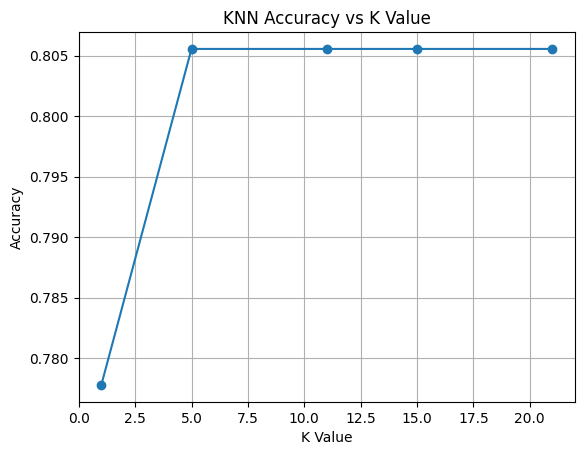

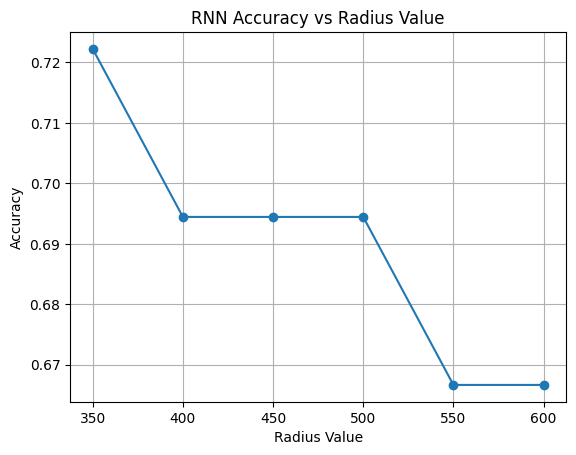

In [5]:
import matplotlib.pyplot as plt

# Plot KNN accuracy vs k values
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.grid(True)
plt.show()

# Plot RNN accuracy vs radius values
plt.figure()
plt.plot(radius_values, rnn_accuracies, marker='o')
plt.xlabel("Radius Value")
plt.ylabel("Accuracy")
plt.title("RNN Accuracy vs Radius Value")
plt.grid(True)
plt.show()


The K-Nearest Neighbors (KNN) classifier demonstrated consistently high and stable accuracy across different k values. This indicates that KNN generalizes well for the Wine dataset because it always considers a fixed number of nearest neighbors to make predictions, regardless of their actual distance. As a result, small fluctuations in data density or outlier points have less impact on the overall prediction, leading to reliable performance across moderate k values.

In contrast, the Radius Neighbors (RNN) classifier's accuracy varied more noticeably with changes in the radius. Since RNN includes all neighbors within a specified distance, its performance is sensitive to how densely packed the data points are in different regions of the feature space. If the radius is too small, some test samples may have few or no neighbors, leading to inaccurate predictions. If the radius is too large, neighbors from other classes may be included, potentially confusing the classifier.

**Implications for model choice:**
- **KNN is preferable** when the dataset is well-scaled and a fixed number of neighbors can provide robust and consistent classification. It is less affected by local variations in data density and tends to be more stable across parameter choices.  
- **RNN may be advantageous** when the dataset has regions of varying density, where a distance-based approach can capture local structure more effectively. However, it requires careful tuning of the radius to balance having enough neighbors without including too many from other classes, making it more sensitive to parameter selection.
